# Import Dependencies

In [919]:
#data cleaning and processing
import pandas as pd
import numpy as np
import scipy as sp

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#preprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#analysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

#warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [920]:
train_s = pd.read_csv('raw data/Surveydata_train.csv')
train_t = pd.read_csv('raw data/Traveldata_train.csv')
test_s = pd.read_csv('raw data/Surveydata_test.csv')
test_t = pd.read_csv('raw data/Traveldata_test.csv')


In [921]:
train_s.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [922]:
train_t.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [923]:
test_s.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [924]:
test_t.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


#### Combine Travel and Survey Data

In [925]:
#Merge training sets
train_df = pd.merge(train_s,train_t,on='ID')
train_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [926]:
#Merge testing sets
test_df = pd.merge(test_s,test_t,on='ID')
test_df.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,...,Excellent,Poor,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,...,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,...,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,...,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


#### Duplicates

In [927]:
print(train_df.shape)
train_df.drop_duplicates().shape

(94379, 25)


(94379, 25)

In [928]:
print(test_df.shape)
test_df.drop_duplicates().shape

(35602, 24)


(35602, 24)

No Duplicate Entries

In [929]:
train_df.columns

Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')

# Dataset Info

In [930]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

#### Missing Values

In [931]:
for i in train_df.columns:
    print("------------------")
    print(f"Column: {i}")
    print(f"{train_df[i].isna().sum()} null values")

------------------
Column: ID
0 null values
------------------
Column: Overall_Experience
0 null values
------------------
Column: Seat_Comfort
61 null values
------------------
Column: Seat_Class
0 null values
------------------
Column: Arrival_Time_Convenient
8930 null values
------------------
Column: Catering
8741 null values
------------------
Column: Platform_Location
30 null values
------------------
Column: Onboard_Wifi_Service
30 null values
------------------
Column: Onboard_Entertainment
18 null values
------------------
Column: Online_Support
91 null values
------------------
Column: Ease_of_Online_Booking
73 null values
------------------
Column: Onboard_Service
7601 null values
------------------
Column: Legroom
90 null values
------------------
Column: Baggage_Handling
142 null values
------------------
Column: CheckIn_Service
77 null values
------------------
Column: Cleanliness
6 null values
------------------
Column: Online_Boarding
6 null values
------------------
Co

#### Columns

In [932]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


# Univariate Analysis

In [933]:
numeric_cols = [i for i in train_df.columns if i not in noncategory]

ID
Skew : 0.0


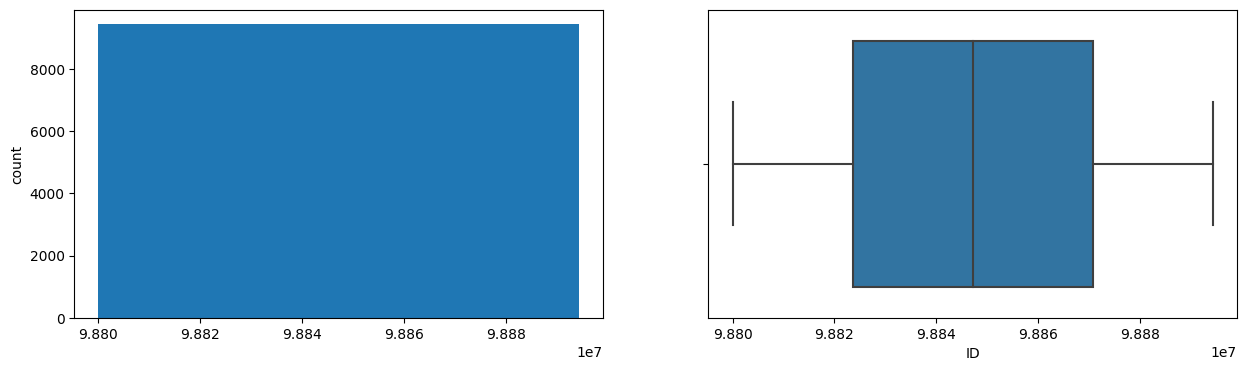

Overall_Experience
Skew : -0.19


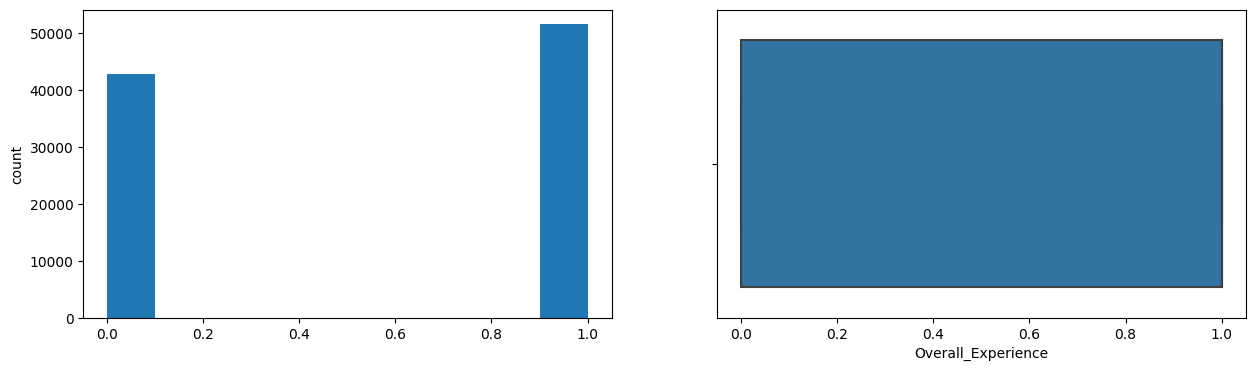

Age
Skew : -0.0


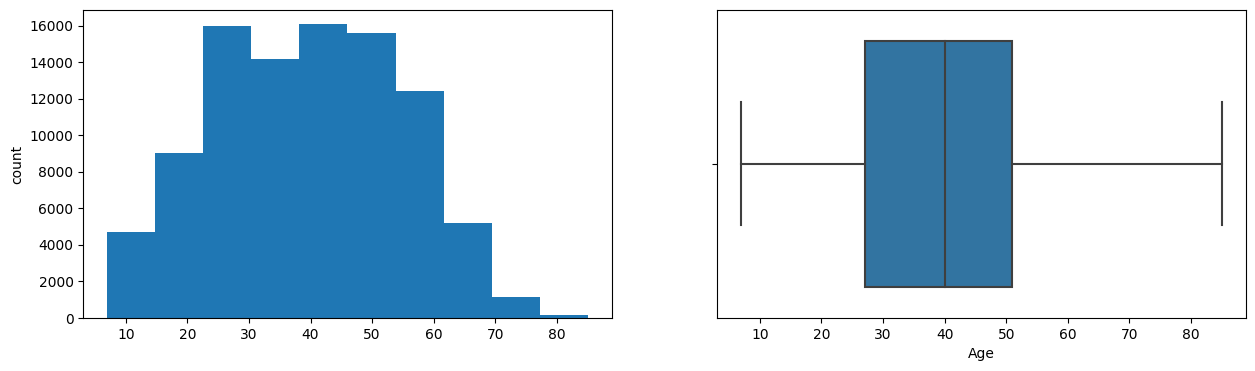

Travel_Distance
Skew : 0.47


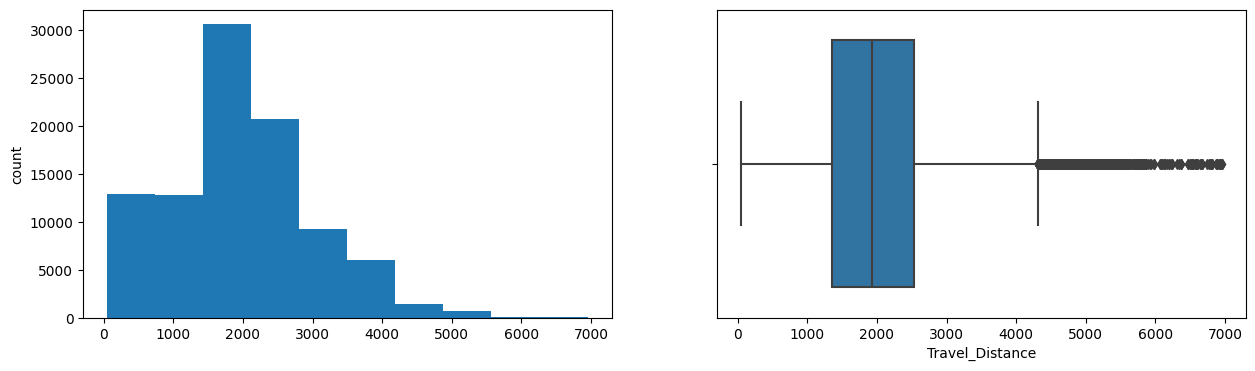

Departure_Delay_in_Mins
Skew : 7.16


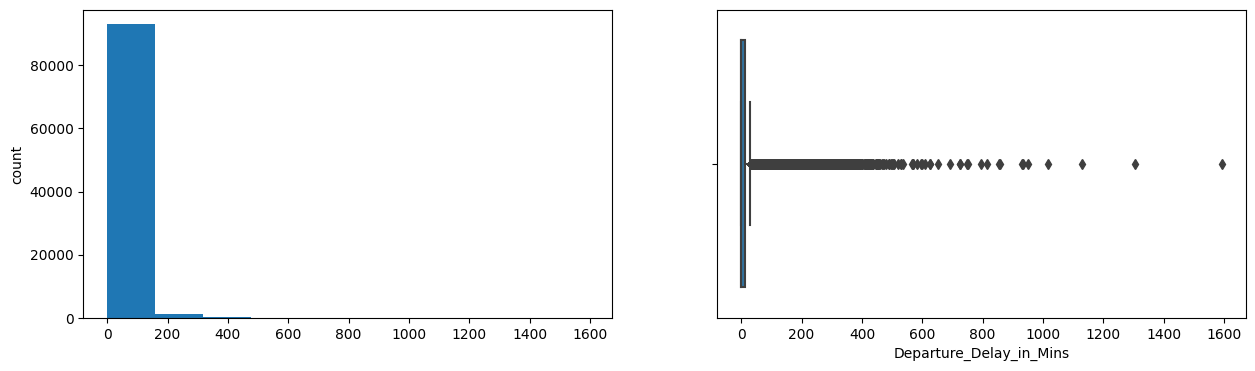

Arrival_Delay_in_Mins
Skew : 6.98


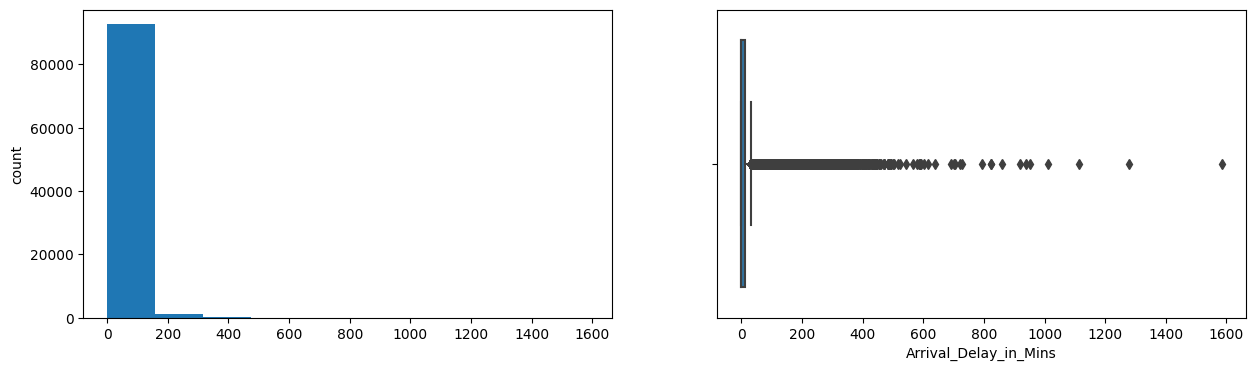

In [934]:
for col in numeric_cols:
    print(col)
    print('Skew :', round(train_df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    train_df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=train_df[col])
    plt.show()

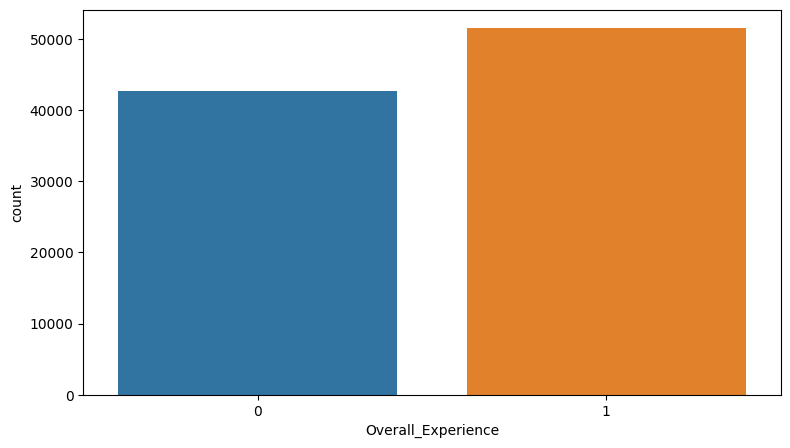

In [935]:
fig = plt.figure(figsize=(9,5))
sns.countplot(train_df['Overall_Experience'])
plt.show()

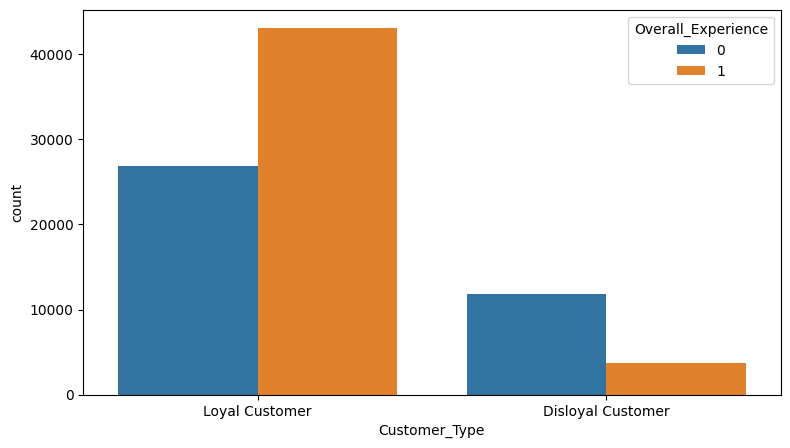

In [936]:
fig = plt.figure(figsize=(9,5))
sns.countplot(train_df['Customer_Type'],hue=train_df['Overall_Experience'])
plt.show()

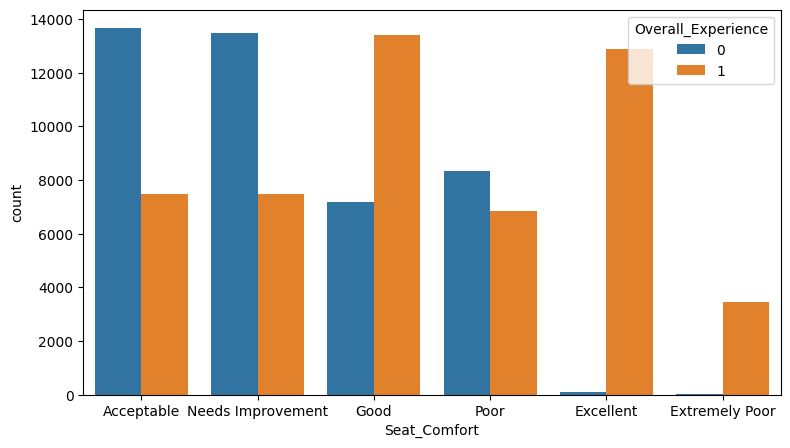

In [937]:
fig = plt.figure(figsize=(9,5))
sns.countplot(train_df['Seat_Comfort'],order=train_df['Seat_Comfort'].value_counts().index,hue=train_df['Overall_Experience'])
plt.show()

# Bivariate Analysis

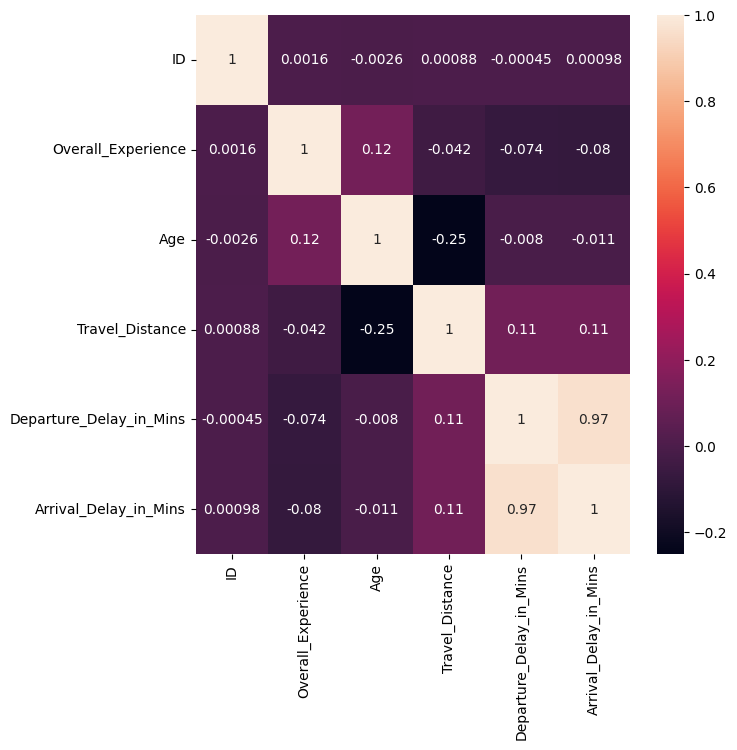

In [938]:
fig = plt.figure(figsize=(7,7))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

# PCA

#### Encode Categorical Variables

In [939]:
noncategory = ['Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
      ]

In [940]:
Seat_Comfort = {
    'Extremely Poor': 1, 
    'Poor': 2, 
    'Needs Improvement': 3, 
    'Acceptable': 4, 
    'Good': 5, 
    'Excellent': 6
}

Seat_Class = {
    'Ordinary': 1,
    'Green Car': 2
}

Arrival_Time_Convenient = {
    'Extremely Poor': 1, 
    'Poor': 2, 
    'Needs Improvement': 3, 
    'Acceptable': 4, 
    'Good': 5, 
    'Excellent': 6
}

Catering = {
    'Extremely Poor': 1, 
    'Poor': 2, 
    'Needs Improvement': 3, 
    'Acceptable': 4, 
    'Good': 5, 
    'Excellent': 6
}

Platform_Location = {
'Very Inconvenient': 1,
'Inconvenient': 2,
'Needs Improvement': 3,
'Manageable': 4,
'Convenient': 5,
'Very Convenient': 6
}

Onboard_Wifi_Service = {
'Extremely Poor': 1,
'Poor': 2,
'Needs Improvement': 3,
'Acceptable': 4,
'Good': 5,
'Excellent': 6
}

Onboard_Entertainment = {
'Extremely Poor': 1,
'Poor': 2,
'Needs Improvement': 3,
'Acceptable': 4,
'Good': 5,
'Excellent': 6
}

Online_Support = {
'Poor': 1,
'Needs Improvement': 2,
'Acceptable': 3,
'Good': 4,
'Excellent': 5
}

Ease_of_Online_Booking = {
'Extremely Poor': 1,
'Poor': 2,
'Needs Improvement': 3,
'Acceptable': 4,
'Good': 5,
'Excellent': 6
}

Onboard_Service = {
'Extremely Poor': 1,
'Poor': 2,
'Needs Improvement': 3,
'Acceptable': 4,
'Good': 5,
'Excellent': 6
}

Legroom = {
'Extremely Poor': 1,
'Poor': 2,
'Needs Improvement': 3,
'Acceptable': 4,
'Good': 5,
'Excellent': 6
}

Baggage_Handling = {
'Poor': 1,
'Needs Improvement': 2,
'Acceptable': 3,
'Good': 4,
'Excellent': 5
}

CheckIn_Service = {
'Poor': 1,
'Needs Improvement': 2,
'Acceptable': 3,
'Good': 4,
'Excellent': 5
}

Cleanliness = {
'Extremely Poor': 1,
'Poor': 2,
'Needs Improvement': 3,
'Acceptable': 4,
'Good': 5,
'Excellent': 6
}

Online_Boarding = {
'Extremely Poor': 1,
'Poor': 2,
'Needs Improvement': 3,
'Acceptable': 4,
'Good': 5,
'Excellent': 6
}

Gender = {
'Male': 0,
'Female': 1
}

Customer_Type = {
'Disloyal Customer': 1,
'Loyal Customer': 2
}

Type_Travel = {
'Personal Travel': 1,
'Business Travel': 2
}

Travel_Class = {
'Eco': 1,
'Business': 2
}

In [941]:
maps = [Seat_Comfort, Seat_Class,
Arrival_Time_Convenient, Catering, Platform_Location,
Onboard_Wifi_Service, Onboard_Entertainment, Online_Support,
Ease_of_Online_Booking, Onboard_Service, Legroom,
Baggage_Handling, CheckIn_Service, Cleanliness, Online_Boarding,
Gender, Customer_Type, Type_Travel, Travel_Class,]

In [942]:
encoded_df = train_df.copy(deep=True)

In [943]:
for ind,i in enumerate(noncategory):
    encoded_df[i] = encoded_df[i].map(maps[ind])
    

encoded_df

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,3.0,2,6.0,6.0,6.0,5.0,3.0,3.0,...,3.0,2.0,1.0,2.0,52.0,NaN,2,272,0.0,5.0
1,98800002,0,2.0,1,6.0,2.0,3.0,5.0,2.0,4.0,...,5.0,5.0,0.0,2.0,48.0,1.0,1,2200,9.0,0.0
2,98800003,1,3.0,2,3.0,3.0,3.0,3.0,5.0,5.0,...,6.0,6.0,1.0,2.0,43.0,2.0,2,1061,77.0,119.0
3,98800004,0,4.0,1,3.0,NaN,3.0,4.0,3.0,3.0,...,4.0,4.0,1.0,2.0,44.0,2.0,2,780,13.0,18.0
4,98800005,1,4.0,1,4.0,4.0,4.0,3.0,5.0,5.0,...,5.0,5.0,1.0,2.0,50.0,2.0,2,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,2.0,1,5.0,5.0,5.0,2.0,2.0,1.0,...,5.0,2.0,0.0,2.0,32.0,2.0,2,1357,83.0,125.0
94375,98894376,1,5.0,1,5.0,5.0,5.0,3.0,6.0,5.0,...,4.0,5.0,0.0,2.0,44.0,2.0,2,592,5.0,11.0
94376,98894377,1,3.0,2,3.0,3.0,3.0,5.0,6.0,4.0,...,5.0,4.0,0.0,NaN,63.0,2.0,2,2794,0.0,0.0
94377,98894378,0,3.0,1,NaN,3.0,5.0,5.0,3.0,4.0,...,6.0,5.0,0.0,2.0,16.0,1.0,1,2744,0.0,0.0


#### Scale Data

In [944]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(encoded_df),columns=encoded_df.columns)
data_scaled.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,-1.732032,-1.098107,-0.602636,0.994811,1.313665,1.486553,1.535771,0.569735,-1.026985,-0.396971,...,-1.479258,-1.811867,0.986015,0.472751,0.832224,NaN,1.046703,-1.660469,-0.384049,-0.260287
1,-1.731996,-1.098107,-1.320760,-1.005216,1.313665,-1.283651,-0.757410,0.569735,-1.769827,0.367483,...,0.256880,0.499285,-1.014183,0.472751,0.567613,-1.486258,-0.955380,0.215099,-0.148068,-0.390362
2,-1.731959,0.910658,-0.602636,0.994811,-0.651910,-0.591100,-0.757410,-0.945975,0.458697,1.131937,...,1.124950,1.269668,0.986015,0.472751,0.236850,0.672831,1.046703,-0.892926,1.634904,2.705435
3,-1.731922,-1.098107,0.115487,-1.005216,-0.651910,NaN,-0.757410,-0.188120,-1.026985,-0.396971,...,-0.611189,-0.271099,0.986015,0.472751,0.303003,0.672831,1.046703,-1.166284,-0.043187,0.077909
4,-1.731886,0.910658,0.115487,-1.005216,0.003282,0.101451,0.006984,-0.945975,0.458697,1.131937,...,0.256880,0.499285,0.986015,0.472751,0.699918,0.672831,1.046703,0.002054,-0.384049,-0.390362


#### PCA

In [945]:
data_scaled = data_scaled.dropna(how='any')
data_scaled = data_scaled.drop(['ID','Overall_Experience'],axis=1)

In [946]:
n = data_scaled.shape[1]

pca = PCA(n_components=n, random_state=1)
data_pc1 = pd.DataFrame(pca.fit_transform(data_scaled))

exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

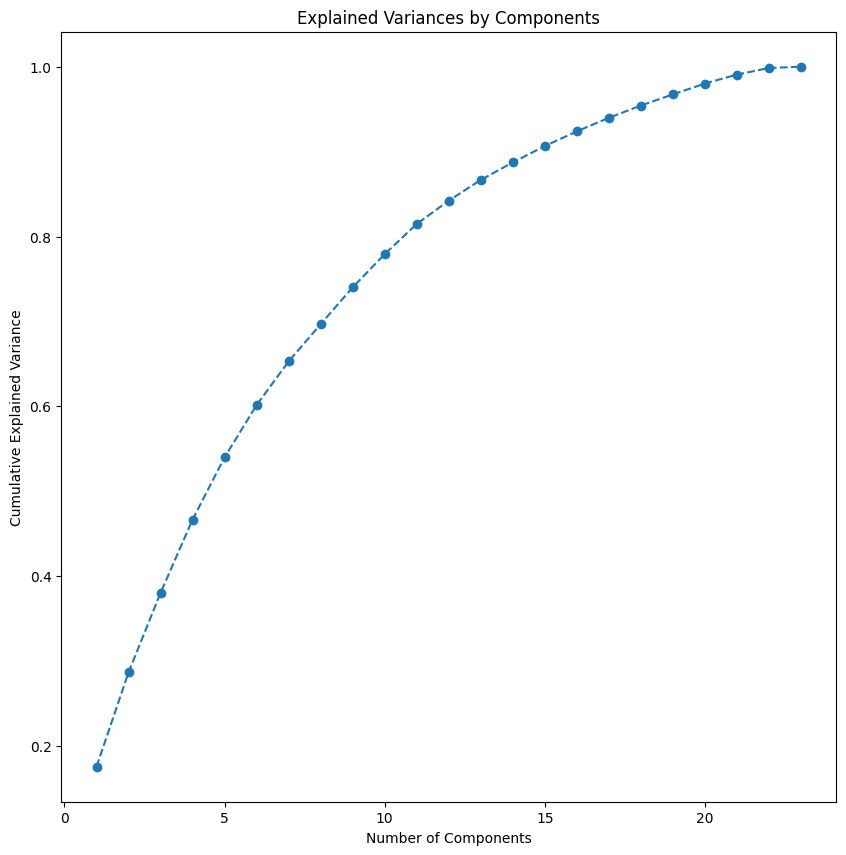

In [947]:
plt.figure(figsize = (10,10))
plt.plot(range(1,24), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [948]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  15


In [949]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca = data_pca.T.sort_values("PC1")

In [950]:
def color_high(val):
    if val <= -0.35: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.35:
        return 'background: skyblue'   
    
data_pca.style.applymap(color_high)


,PC1,PC2,PC3
Ease_of_Online_Booking,-0.410000,0.150000,0.090000
Online_Support,-0.340000,0.130000,0.330000
Online_Boarding,-0.330000,0.140000,0.330000
Onboard_Entertainment,-0.300000,-0.100000,0.170000
Onboard_Service,-0.290000,0.090000,-0.360000
Cleanliness,-0.270000,0.080000,-0.420000
Onboard_Wifi_Service,-0.270000,0.120000,0.360000
Baggage_Handling,-0.260000,0.080000,-0.420000
Legroom,-0.240000,0.060000,-0.300000
Seat_Comfort,-0.220000,-0.440000,0.030000


- Ease_of_Online_Booking
- Online_Support
- Online_Boarding
- Onboard_Entertainment
- Onboard_Service
- Cleanliness
- Onboard_Wifi_Service
- Baggage_Handling
- Legroom
- Seat_Comfort
- CheckIn_Service
- Catering
- Travel_Class
- Customer_Type
- Arrival_Time_Convenient
- Gender
- Age
- Platform_Location
- Type_Travel
- Seat_Class
- Travel_Distance
- Departure_Delay_in_Mins
- Arrival_Delay_in_Mins

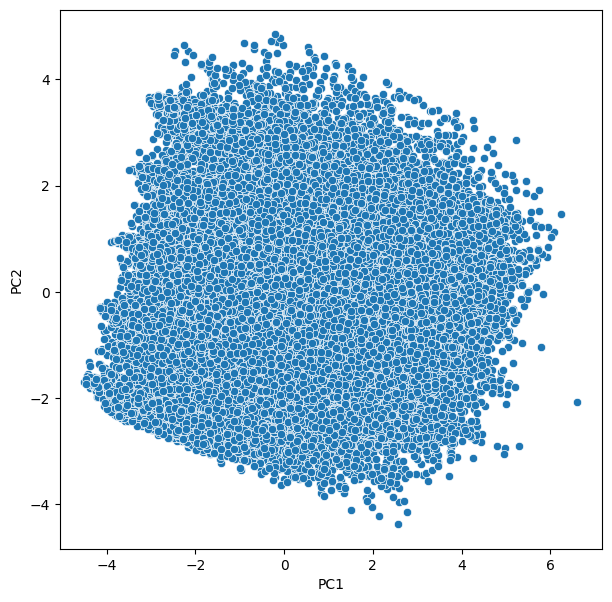

In [951]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pc1[0],y=data_pc1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Text(0, 0.5, 'PC2')

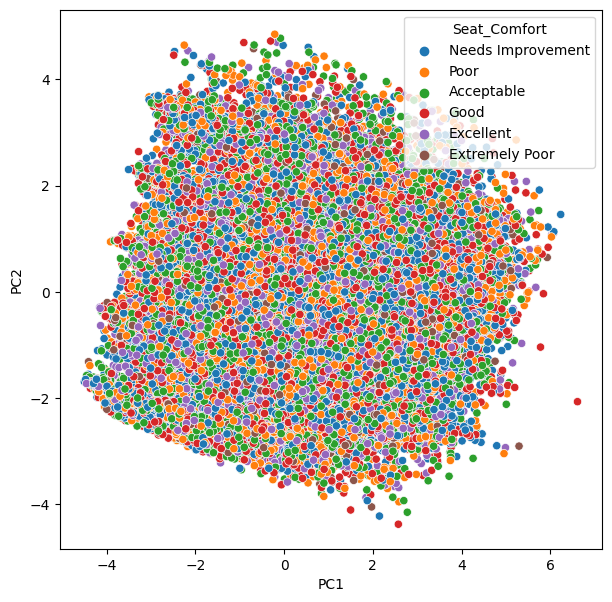

In [952]:
df_concat = pd.concat([data_pc1, train_df], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='Seat_Comfort')
plt.xlabel("PC1")
plt.ylabel("PC2")

# New Data

In [953]:
new_df = encoded_df[['Ease_of_Online_Booking', 'Online_Support', 'Online_Boarding',
       'Onboard_Entertainment', 'Onboard_Service', 'Cleanliness',
       'Onboard_Wifi_Service', 'Baggage_Handling', 'Legroom', 'Seat_Comfort',
       'CheckIn_Service', 'Catering', 'Travel_Class', 'Customer_Type',
       'Arrival_Time_Convenient', 'Gender', 'Age', 'Platform_Location',
       'Type_Travel', 'Seat_Class', 'Travel_Distance',
       'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']]
new_df = pd.concat([train_df[['ID','Overall_Experience']],new_df],axis=1)
new_df

,ID,Overall_Experience,Ease_of_Online_Booking,Online_Support,Online_Boarding,Onboard_Entertainment,Onboard_Service,Cleanliness,Onboard_Wifi_Service,Baggage_Handling,...,Customer_Type,Arrival_Time_Convenient,Gender,Age,Platform_Location,Type_Travel,Seat_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,2.0,...,2.0,6.0,1.0,52.0,6.0,NaN,2,272,0.0,5.0
1,98800002,0,5.0,4.0,5.0,2.0,6.0,5.0,5.0,1.0,...,2.0,6.0,0.0,48.0,3.0,1.0,1,2200,9.0,0.0
2,98800003,1,6.0,5.0,6.0,5.0,6.0,6.0,3.0,5.0,...,2.0,3.0,1.0,43.0,3.0,2.0,2,1061,77.0,119.0
3,98800004,0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,...,2.0,3.0,1.0,44.0,3.0,2.0,1,780,13.0,18.0
4,98800005,1,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,...,2.0,4.0,1.0,50.0,4.0,2.0,1,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,2.0,1.0,2.0,2.0,5.0,5.0,2.0,4.0,...,2.0,5.0,0.0,32.0,5.0,2.0,1,1357,83.0,125.0
94375,98894376,1,4.0,5.0,5.0,6.0,4.0,4.0,3.0,3.0,...,2.0,5.0,0.0,44.0,5.0,2.0,1,592,5.0,11.0
94376,98894377,1,5.0,4.0,4.0,6.0,5.0,5.0,5.0,4.0,...,NaN,3.0,0.0,63.0,3.0,2.0,2,2794,0.0,0.0
94377,98894378,0,5.0,4.0,5.0,3.0,4.0,6.0,5.0,4.0,...,2.0,NaN,0.0,16.0,5.0,1.0,1,2744,0.0,0.0


In [958]:
new_test_df = encoded_df[['Ease_of_Online_Booking', 'Online_Support', 'Online_Boarding',
       'Onboard_Entertainment', 'Onboard_Service', 'Cleanliness',
       'Onboard_Wifi_Service', 'Baggage_Handling', 'Legroom', 'Seat_Comfort',
       'CheckIn_Service', 'Catering', 'Travel_Class', 'Customer_Type',
       'Arrival_Time_Convenient', 'Gender', 'Age', 'Platform_Location',
       'Type_Travel', 'Seat_Class', 'Travel_Distance',
       'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']]
new_test_df = pd.concat([test_df[['ID']],new_test_df],axis=1)
new_test_df

,ID,Ease_of_Online_Booking,Online_Support,Online_Boarding,Onboard_Entertainment,Onboard_Service,Cleanliness,Onboard_Wifi_Service,Baggage_Handling,Legroom,...,Customer_Type,Arrival_Time_Convenient,Gender,Age,Platform_Location,Type_Travel,Seat_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,2.0,4.0,...,2.0,6.0,1.0,52.0,6.0,NaN,2,272,0.0,5.0
1,99900002.0,5.0,4.0,5.0,2.0,6.0,5.0,5.0,1.0,3.0,...,2.0,6.0,0.0,48.0,3.0,1.0,1,2200,9.0,0.0
2,99900003.0,6.0,5.0,6.0,5.0,6.0,6.0,3.0,5.0,6.0,...,2.0,3.0,1.0,43.0,3.0,2.0,2,1061,77.0,119.0
3,99900004.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2.0,3.0,1.0,44.0,3.0,2.0,1,780,13.0,18.0
4,99900005.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,...,2.0,4.0,1.0,50.0,4.0,2.0,1,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,NaN,2.0,1.0,2.0,2.0,5.0,5.0,2.0,4.0,5.0,...,2.0,5.0,0.0,32.0,5.0,2.0,1,1357,83.0,125.0
94375,NaN,4.0,5.0,5.0,6.0,4.0,4.0,3.0,3.0,4.0,...,2.0,5.0,0.0,44.0,5.0,2.0,1,592,5.0,11.0
94376,NaN,5.0,4.0,4.0,6.0,5.0,5.0,5.0,4.0,5.0,...,NaN,3.0,0.0,63.0,3.0,2.0,2,2794,0.0,0.0
94377,NaN,5.0,4.0,5.0,3.0,4.0,6.0,5.0,4.0,5.0,...,2.0,NaN,0.0,16.0,5.0,1.0,1,2744,0.0,0.0


In [959]:
new_df.to_csv('new data/train.csv')
new_test_df.to_csv('new data/test.csv')